題目：請在 Capital Bikeshare （美國 Washington, D.C.的一個共享單車公司）提供的自行
車數據上進行回歸分析。訓練數據為 2011 年的數據，要求預測 2012 年每天的單車
共享數量

## 1、導入必要的工具包

In [1]:
#-*- coding:UTF-8 -*-
#!/usr/bin/evn python
#工作環境python3.6
import numpy as np  # 矩陣操作
import pandas as pd # SQL數據處理

from sklearn.metrics import r2_score  #評價回歸預測模型的性能
from sklearn.linear_model import  RidgeCV #嶺
from sklearn.linear_model import LassoCV  #Lasso
from sklearn.preprocessing import OneHotEncoder #熱編碼
from sklearn.preprocessing import  scale,StandardScaler,MinMaxScaler #數據標準化

import matplotlib.pyplot as plt   #畫圖
import matplotlib as mpl
import seaborn as sns

# 圖形出現在Notebook里而不是新窗口
%matplotlib inline

In [2]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

## 2、數據探索

### 2.1 讀取數據

In [3]:
# path to where the data lies
# dpath = '.test/'
data = pd.read_csv("day.csv")

#通過觀察前5行，了解數據每列（特征）的概況
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011/1/2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011/1/3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011/1/4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011/1/5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###  2.2 數據基本信息
樣本數目、特征維數
每個特征的類型、空值樣本的數目、數據類型

In [4]:
data.shape

(731, 16)

# 2.3 數據探索
已在文件里面把幾個散點值改為了均值（其中包括46行windspeed列，51行windspeed列，51行hum,70Lhum,293Lwindspeed,422Lwindspeed,434Lwindspeed,）共七個值

# 2.4判斷數據正態性

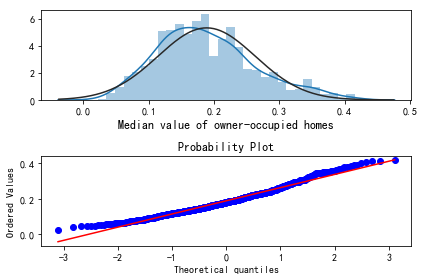

In [5]:
from scipy.stats import norm
fig =plt.subplot(211)
sns.distplot(data['windspeed'].values, bins=30, kde=True,fit=norm)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)

cs =plt.subplot(212)
from scipy import stats
res = stats.probplot(data['windspeed'], plot=plt)
plt.tight_layout()
plt.show()

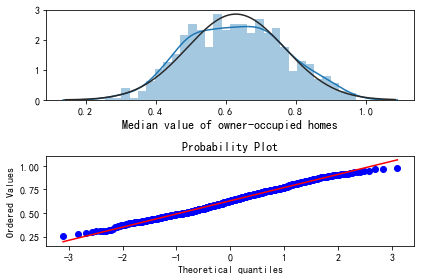

In [6]:
fig =plt.subplot(211)
sns.distplot(data['hum'].values, bins=30, kde=True,fit=norm)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)

cs =plt.subplot(212)
res = stats.probplot(data['hum'], plot=plt)
plt.tight_layout()
plt.show()

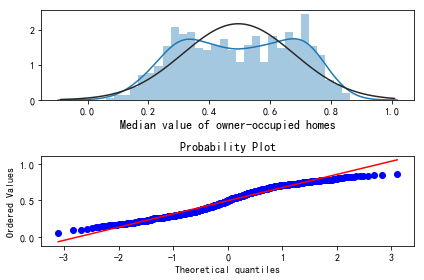

In [7]:


fig =plt.subplot(211)
sns.distplot(data['temp'].values, bins=30, kde=True,fit=norm)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)

cs =plt.subplot(212)
res = stats.probplot(data['temp'], plot=plt)
plt.tight_layout()
plt.show()

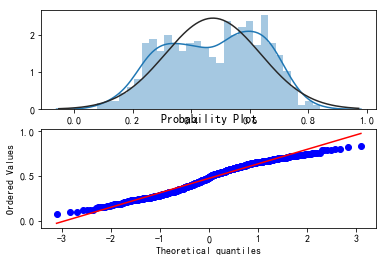

In [8]:
fig =plt.subplot(211)
sns.distplot(data['atemp'].values, bins=30, kde=True,fit=norm)
plt.xlabel('Median value of owner-occupied homes', fontsize=12)

cs =plt.subplot(212)
res = stats.probplot(data['atemp'], plot=plt)
plt.show()

In [9]:
#連續數據基本符合正態分布

In [10]:
#去除唯一屬性
data = data.drop('instant', axis = 1)
#對離散數據進行熱編碼
a1 = (OneHotEncoder(sparse = False).fit_transform( data[['season','mnth','holiday','weekday','workingday','weathersit']]))
da= pd.DataFrame(columns=['season1','season2','season3','season4', 'mnth1','mnth2','mnth3','mnth4','mnth5','mnth6',
                          'mnth7','mnth8','mnth9','mnth10','mnth11','mnth12','holiday1','holiday2','weekday1','weekday2','weekday3','weekday4',
                          'weekday5','weekday6','weekday7','workingday1','workingday2','weathersit1','weathersit2','weathersit3',], data = a1)
data['season1'] = da['season1']
data['season2'] = da['season2']
data['season3'] = da['season3']
data['season4'] = da['season4']
# data['mnth1'] = da['mnth1']
# data['mnth2'] = da['mnth2']
# data['mnth3'] = da['mnth3']
# data['mnth4'] = da['mnth4']
# data['mnth5'] = da['mnth5']
# data['mnth6'] = da['mnth6']
# data['mnth7'] = da['mnth7']
# data['mnth8'] = da['mnth8']
# data['mnth9'] = da['mnth9']
# data['mnth10'] = da['mnth10']
# data['mnth11'] = da['mnth11']
# data['mnth12'] = da['mnth12']
#data['holiday1'] = da['holiday1']
#data['holiday2'] = da['holiday2']
data['weekday1'] = da['weekday1']
data['weekday2'] = da['weekday2']
data['weekday3'] = da['weekday3']
data['weekday4'] = da['weekday4']
data['weekday5'] = da['weekday5']
data['weekday6'] = da['weekday6']
data['weekday7'] = da['weekday7']
data['workingday1'] = da['workingday1']
data['workingday2'] = da['workingday2']
data['weathersit1'] = da['weathersit1']
data['weathersit2'] = da['weathersit2']
data['weathersit3'] = da['weathersit3']

#去掉熱編碼之後的原數據
data = data.drop(['dteday', 'season', 'weekday', 'mnth', 'holiday', 'workingday', 'weathersit'], axis = 1)

#去掉不用的兩個y值
data = data.drop(['casual', 'registered'], axis = 1)
# 從原始數據中分離訓練集和測試集
training_data = data[data.yr ==0]
# 從訓練集中分離輸入特征x和輸出y
training_data_cnt_y = training_data['cnt'].values
training_data_x = training_data.drop('cnt', axis = 1)
test_data = data[data.yr ==1]
# 從測試集數據中分離輸入特征x和輸出y
test_data_cnt_y = test_data['cnt'].values
test_data_x = test_data.drop('cnt', axis = 1)
#去除不必要的特征yr
training_data = training_data_x.drop('yr',axis = 1)
test_data = test_data_x.drop('yr',axis = 1)

In [11]:
#多項式特征
from sklearn.preprocessing import PolynomialFeatures
x=pd.DataFrame()
x['temp'] = training_data['temp']
x['atemp'] = training_data['atemp']
x['hum'] = training_data['hum']
x['windspeed'] = training_data['windspeed']


y=pd.DataFrame()
y['temp'] = test_data['temp']
y['atemp'] = test_data['atemp']
y['hum'] = test_data['hum']
y['windspeed'] = test_data['windspeed']



#創建4次方的多項式
poly = PolynomialFeatures(4)
x = poly.fit_transform(x)
y = poly.transform(y)

training_data = training_data.drop(['temp', 'atemp', 'hum', 'windspeed'], axis = 1)

test_data = test_data.drop(['temp', 'atemp', 'hum', 'windspeed'], axis = 1)

training_data = np.hstack((training_data,x))
test_data = np.hstack((test_data,y))

# 數據標準化

In [12]:
X_train = scale(training_data)
X_test = scale(test_data)

y_train = scale(training_data_cnt_y)
y_test = scale(test_data_cnt_y)

# fit
#transform
# sx = StandardScaler()    # (x-mean)/std
# X_train =sx.fit_transform(training_data)
# X_test = sx.fit_transform(test_data)
# sy = StandardScaler()
# y_train = sy.fit_transform(training_data_cnt_y.reshape(-1,1))
# y_test = sy.fit_transform(test_data_cnt_y.reshape(-1,1))

# sx = StandardScaler()
# sx.fit(training_data)
# X_train =sx.transform(training_data)
# X_test = sx.transform(test_data)
# sy = StandardScaler()
# y_train = sy.fit_transform(training_data_cnt_y.reshape(-1,1))
# y_test = sy.fit_transform(test_data_cnt_y.reshape(-1,1))


# sx = StandardScaler()
# X_train =sx.fit_transform(training_data)
# X_test = sx.transform(test_data)
# sy = StandardScaler()
# sy.fit(training_data_cnt_y.reshape(-1,1))
# y_train = sy.fit_transform(training_data_cnt_y.reshape(-1,1))
# y_test = sy.transform(test_data_cnt_y.reshape(-1,1))
# mean_test_y = y_test.mean()

# sx = MinMaxScaler()
# X_train =sx.fit_transform(training_data)
# X_test = sx.transform(test_data)

# X_train =training_data
# X_test =test_data
# sy = StandardScaler()
# print(training_data_cnt_y.mean())
# print(test_data_cnt_y.mean())
# y_train = sy.fit_transform(training_data_cnt_y.reshape(-1,1))
# y_test = sy.transform(test_data_cnt_y.reshape(-1,1))
# mean_test_y  = y_test.mean()

D:\TOOL\zwPython\py36\python-3.6.2.amd64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


#嶺回歸

In [13]:
#發現各特征差異較大，需要進行數據標準化預處理
#標準化的目的在於避免原始特征值差異過大，導致訓練得到的參數權重不歸一，無法比較各特征的重要性

The r2 score of RidgeCV on test is 0.7475048242964841
The r2 score of RidgeCV on train is 0.8986032202044514
alpha is: 0.007


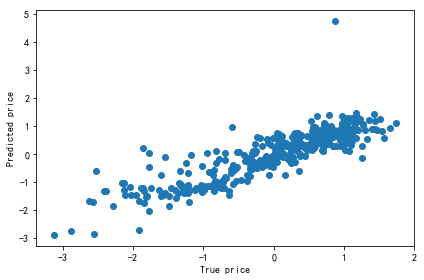

In [14]:
# 設置超參數（正則參數）範圍
#alphas = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]
# alphas = [i/1000 for i in range(1,20)]
# n_alphas = 5
# alphas = np.logspace(-10,10,n_alphas)
#alphas = [2.5880299999999998] #找到量級逐個試
alphas = [0.007]
#生成一個RidgeCV實例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
#ridge = RidgeCV( store_cv_values=True)
#模型訓練
ridge.fit(X_train, y_train)
#預測
y_test_pred_ridge = ridge.predict(X_test)
# y_test_pred_ridge +=mean_test_y 
y_train_pred_ridge = ridge.predict(X_train)

# 評估，使用r2_score評價模型在測試集和訓練集上的性能
print ('The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))



print ('alpha is:', ridge.alpha_)

#plt.subplot(212)
#plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_test_pred_ridge)
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()
#0.7441204955496773
#0.7599551334882537
#0.7608719240108457

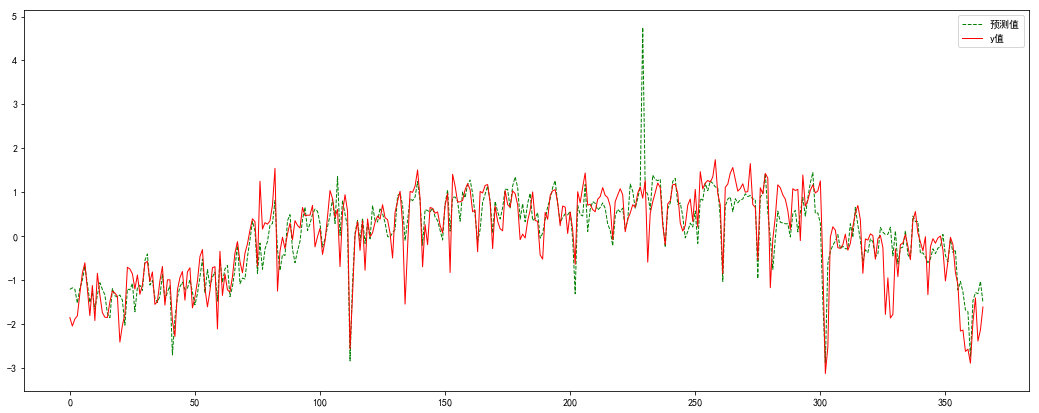

In [15]:
plt.figure(figsize=(18, 7), facecolor='w')
plt.plot(y_test_pred_ridge, 'g--', lw=1, label=u'預測值')    # 原始值
plt.plot(y_test, 'r-', lw=1, label=u'y值')     # 校正值
plt.legend(loc='best')
# plt.xlim(0, 80000)
# plt.grid(b=True)

# plt.tight_layout(1.5, rect=(0, 0, 1, 0.95))
# plt.suptitle(u'異常值檢測與校正', fontsize=22)
plt.show()

In [16]:
#Lasso

D:\TOOL\zwPython\py36\python-3.6.2.amd64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\TOOL\zwPython\py36\python-3.6.2.amd64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The r2 score of LassoCV on test is 0.8224495158383933
The r2 score of LassoCV on train is 0.8832613898649964
alpha is: 0.001


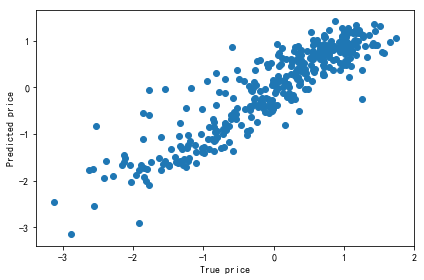

In [17]:
#設置超參數搜索範圍
#alphas = [0.001, 0.01, 0.1, 1, 10,100]
#n_alphas = 5
#alphas = np.logspace(-10,10,n_alphas)
alphas = [0.001]

#生成一個LassoCV實例
lasso = LassoCV(alphas=alphas)
#lasso = LassoCV()

#訓練（內含CV）
lasso.fit(X_train, y_train)

#測試
y_test_pred_lasso = lasso.predict(X_test)
# y_test_pred_lasso += mean_test_y 
y_train_pred_lasso = lasso.predict(X_train)


# 評估，使用r2_score評價模型在測試集和訓練集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))
print ('alpha is:', lasso.alpha_)


plt.scatter(y_test, y_test_pred_lasso)
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.show()

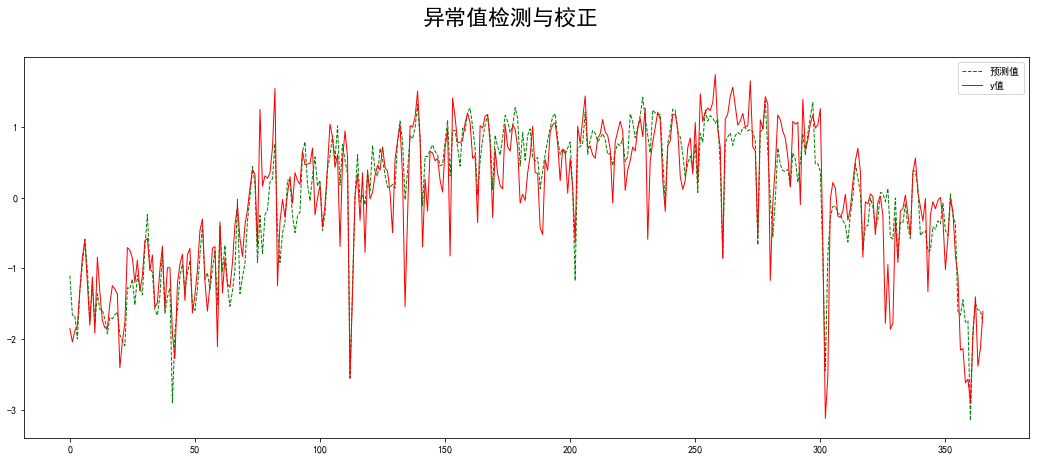

In [18]:
plt.figure(figsize=(18, 7), facecolor='w')
plt.plot(y_test_pred_lasso, 'g--', lw=1, label=u'預測值')    # 原始值
plt.plot(y_test, 'r-', lw=1, label=u'y值')     # 校正值
plt.legend(loc='best')
# plt.grid(b=True)

# plt.tight_layout(1.5, rect=(0, 0, 1, 0.95))
plt.suptitle(u'異常值檢測與校正', fontsize=22)
plt.show()